<a href="https://colab.research.google.com/github/jangsoyeon98-stack/data-analysis-practice/blob/main/2_3%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bit.ly/4abDxJo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!apt-get update -qq
!apt-get install -y fonts-nanum -qq

import matplotlib.font_manager as fm
fm._load_fontmanager(try_read_cache=False)

plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

print("환경 설정 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
환경 설정 완료


In [ ]:
mpg = sns.load_dataset("mpg")

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
bike = pd.read_csv("/content/서울특별시 공공자전거 일별 대여건수_25.7-12.csv", encoding="cp949")

bike.head()

,대여일자,대여건수
0,2025-07-01,132914
1,2025-07-02,151653
2,2025-07-03,151092
3,2025-07-04,151367
4,2025-07-05,118354


In [ ]:
bike.columns.tolist()

['대여일자', '대여건수']

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여일자    184 non-null    object
 1   대여건수    184 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
bike["대여일자"] = pd.to_datetime(bike["대여일자"])

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   대여일자    184 non-null    datetime64[ns]
 1   대여건수    184 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


- 자료: 날짜별 따릉이 이용건수

- 질문: 계절에 따라 따릉이 이용건수에 영향을 끼칠까?

- 분석: 월별 이용건수를 통해 계절별 따릉이 이용건수를 알아내고 상관관계를 알아보자.

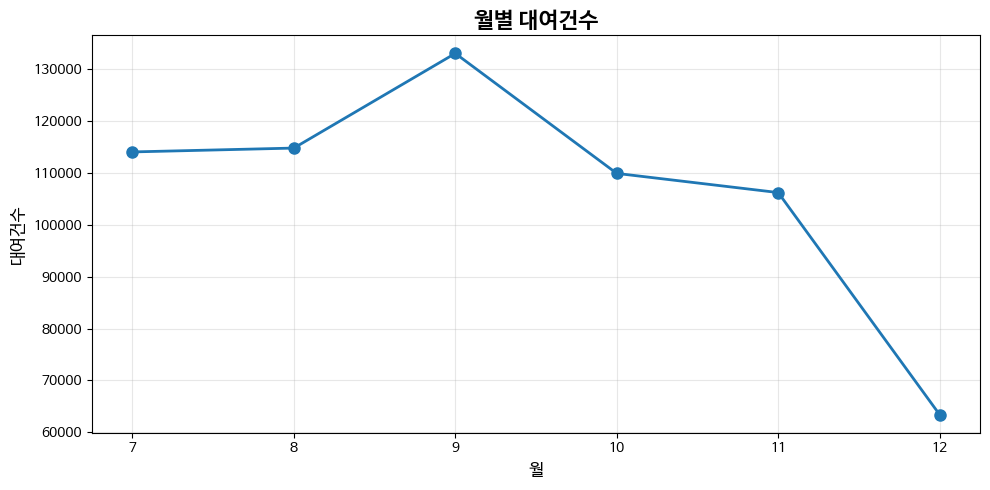

In [ ]:
bike['월'] = bike['대여일자'].dt.month

month = bike.groupby('월')['대여건수'].mean().index
대여건수_mean = bike.groupby('월')['대여건수'].mean().values

plt.figure(figsize=(10, 5))
plt.plot(month, 대여건수_mean, marker= 'o', linewidth = 2, markersize = 8)

plt.title('월별 대여건수', fontsize = 16, fontweight = 'bold')

plt.xlabel('월', fontsize = 12)
plt.ylabel('대여건수', fontsize = 12)

plt.grid(True, alpha= 0.3)
plt.tight_layout()

plt.show()

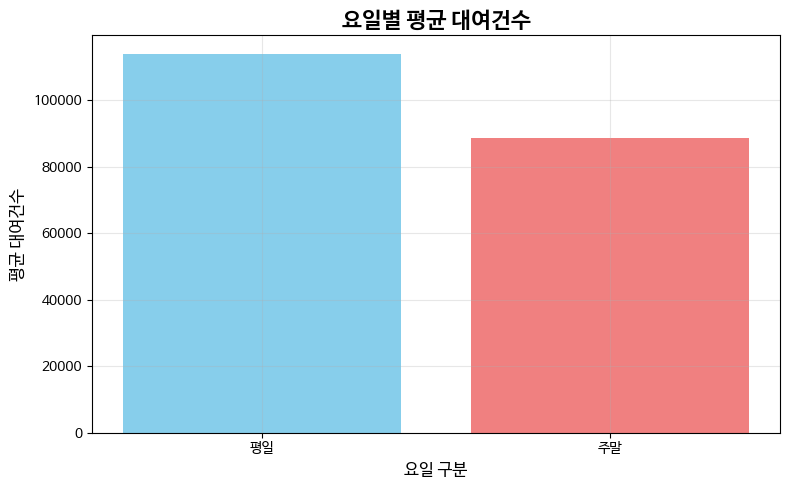

In [ ]:
# '대여일자'에서 요일(월=0, 일=6) 추출
bike['요일'] = bike['대여일자'].dt.dayofweek

# 요일을 '주말' (토, 일) 또는 '평일' (월-금)으로 분류
bike['요일_구분'] = bike['요일'].apply(lambda x: '주말' if x >= 5 else '평일')

# '요일_구분'별로 '대여건수'의 평균 계산
daily_mean_rentals = bike.groupby('요일_구분')['대여건수'].mean()

# 주말 및 평일 평균 대여건수 추출
주말대여건수_mean = daily_mean_rentals.get('주말', 0)
평일대여건수_mean = daily_mean_rentals.get('평일', 0)

# 플로팅을 위한 라벨과 값
labels = ['평일', '주말']
means = [평일대여건수_mean, 주말대여건수_mean]

plt.figure(figsize=(8, 5))
plt.bar(labels, means, color=['skyblue', 'lightcoral'])

plt.title('요일별 평균 대여건수', fontsize = 16, fontweight = 'bold')
plt.xlabel('요일 구분', fontsize = 12)
plt.ylabel('평균 대여건수', fontsize = 12)

plt.grid(True, alpha= 0.3)
plt.tight_layout()
plt.show()

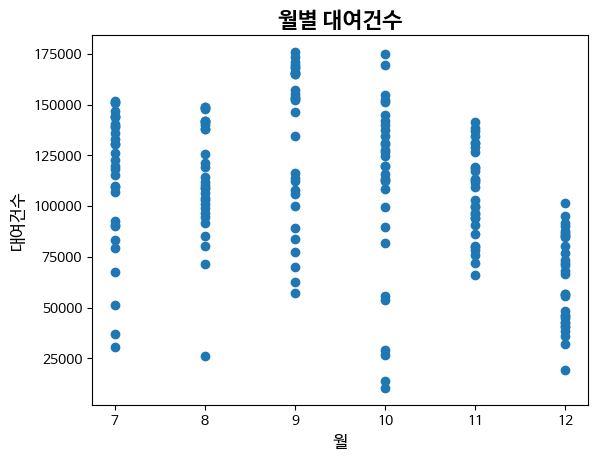

In [ ]:
plt.scatter(bike['월'],bike['대여건수'])

plt.title('월별 대여건수', fontsize=16, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('대여건수', fontsize=12)

plt.show()

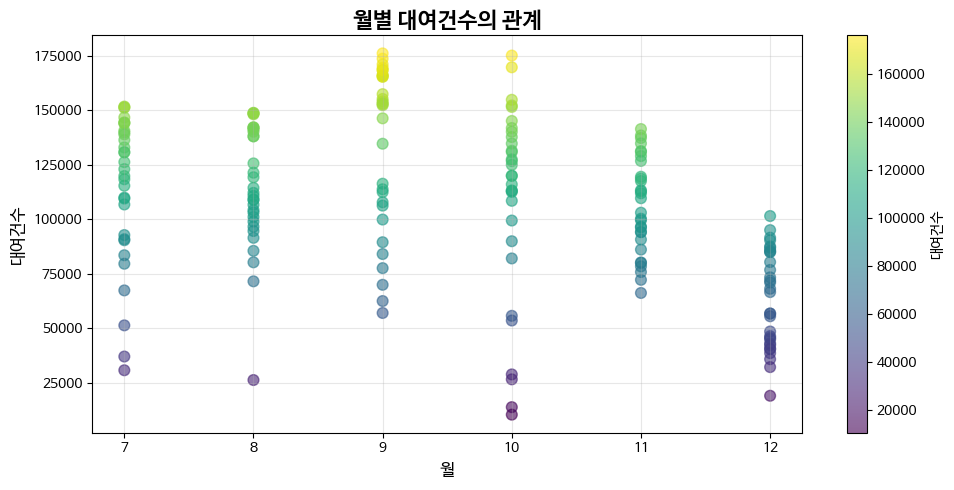

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(bike['월'], bike['대여건수'], c=bike['대여건수'], cmap = 'viridis', s = 60, alpha = 0.6) # s 는 점의 면적

plt.title('월별 대여건수의 관계', fontsize=16, fontweight='bold')
plt.xlabel('월', fontsize=12)
plt.ylabel('대여건수', fontsize=12)

plt.colorbar(label='대여건수')
plt.grid(True, alpha= 0.3)

plt.tight_layout()
plt.show()

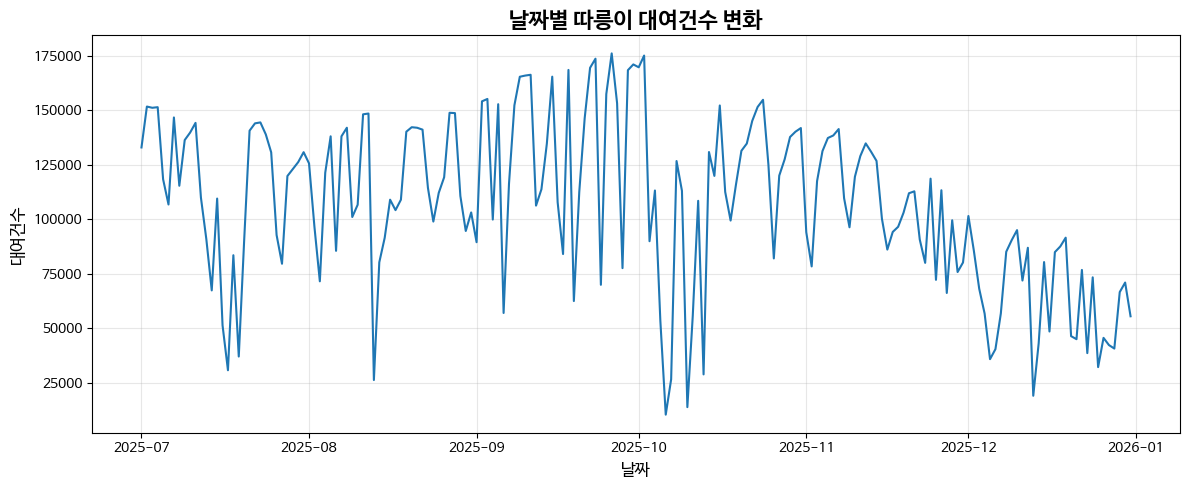

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(bike['대여일자'],bike['대여건수'])
plt.title('날짜별 따릉이 대여건수 변화', fontsize = 16, fontweight = 'bold')

plt.xlabel('날짜', fontsize = 12)
plt.ylabel('대여건수', fontsize = 12)
plt.grid(True, alpha= 0.3)
plt.tight_layout()

plt.show()

일마다의 변동이 심하다.


날이 추워질수록 대여건수가 줄어드는 경향을 보인다.

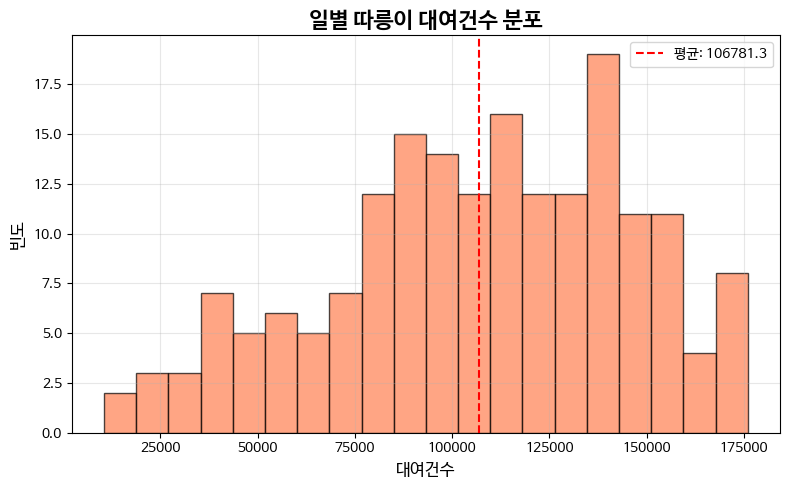

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(bike['대여건수'], bins=20, color='coral', edgecolor='black', alpha=0.7)

plt.title('일별 따릉이 대여건수 분포', fontsize = 16, fontweight = 'bold')
plt.xlabel('대여건수', fontsize = 12)
plt.ylabel('빈도', fontsize = 12)

plt.axvline(bike['대여건수'].mean(), color='red', linestyle='--', label=f'평균: {bike['대여건수'].mean():.1f}') # 평균값

plt.legend() # 범례: 의미하는 바를 명시(빨간 점선이 의미하는 바가 무엇인지 명시해 줌.)
plt.grid(True, alpha= 0.3) # 뒤에 배경선

plt.tight_layout()
plt.show()

하반기의 대여건수의 평균이 10만건 정도 된다.

일별 대여건수가 한쪽으로 치우쳐 분포되어 있다.

일부날짜에는 대여건수가 평균보다 매우 낮거나, 매우 높은 날도 있다.  

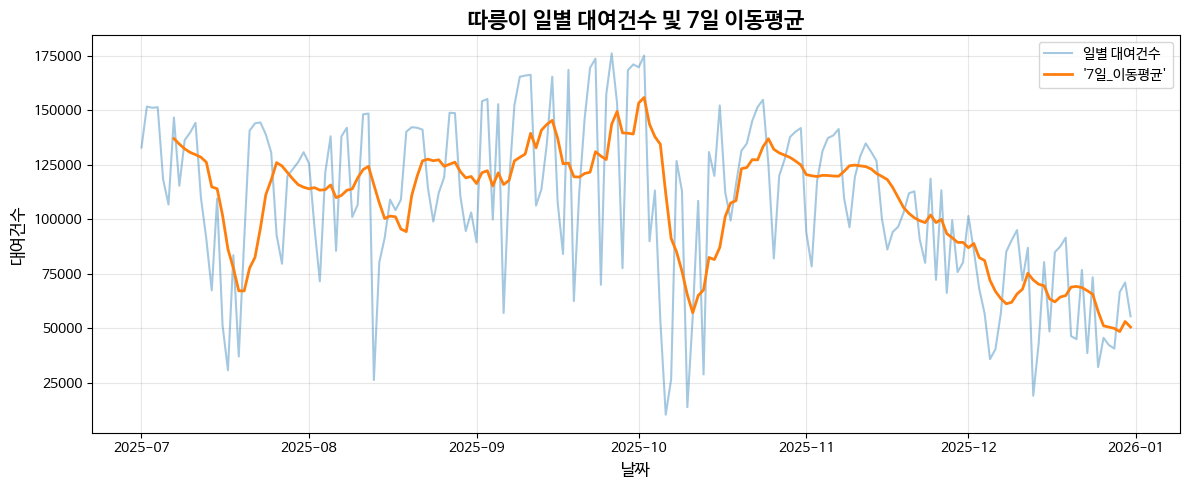

In [ ]:
bike['7일_이동평균'] = bike['대여건수'].rolling(window=7).mean()

plt.figure(figsize=(12, 5))
plt.plot(bike['대여일자'], bike['대여건수'], alpha= 0.4, label="일별 대여건수")
plt.plot(bike['대여일자'], bike['7일_이동평균'], linewidth = 2, label="'7일_이동평균'")

plt.title('따릉이 일별 대여건수 및 7일 이동평균', fontsize = 16, fontweight = 'bold')

plt.xlabel('날짜', fontsize = 12)
plt.ylabel('대여건수', fontsize = 12)
plt.legend()
plt.grid(True, alpha= 0.3)

plt.tight_layout()
plt.show()

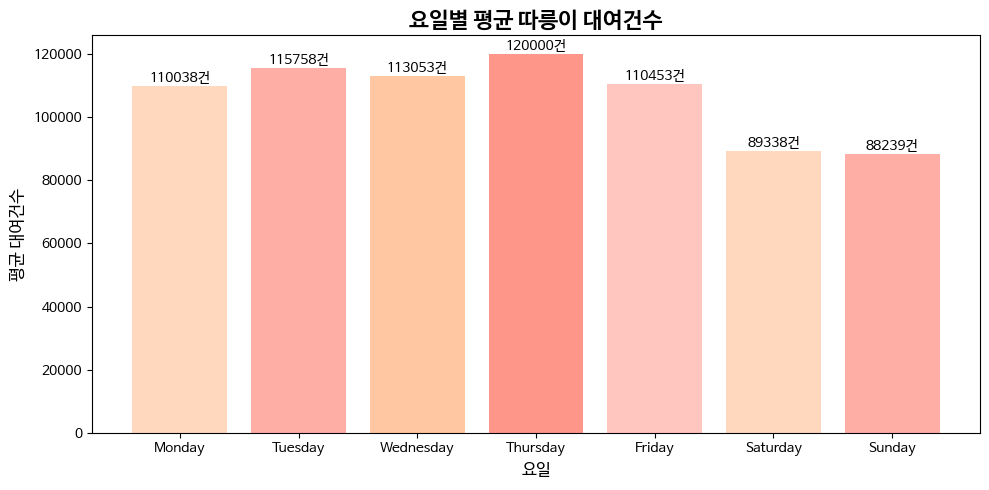

In [ ]:
bike['요일'] = bike['대여일자'].dt.day_name()

weekday_mean = bike.groupby('요일')['대여건수'].mean()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_mean = weekday_mean.reindex(order)

plt.figure(figsize=(10, 5))
bars = plt.bar(weekday_mean.index, weekday_mean.values, color=['#FFD8BE', '#FFAEA5', '#FFC8A2', '#FF968A', '#FFC5BF'])

plt.title('요일별 평균 따릉이 대여건수', fontsize = 16, fontweight = 'bold')
plt.xlabel('요일', fontsize = 12)
plt.ylabel('평균 대여건수', fontsize = 12)

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}건',
          ha='center', va='bottom', fontsize = 10)

plt.tight_layout()
plt.show()

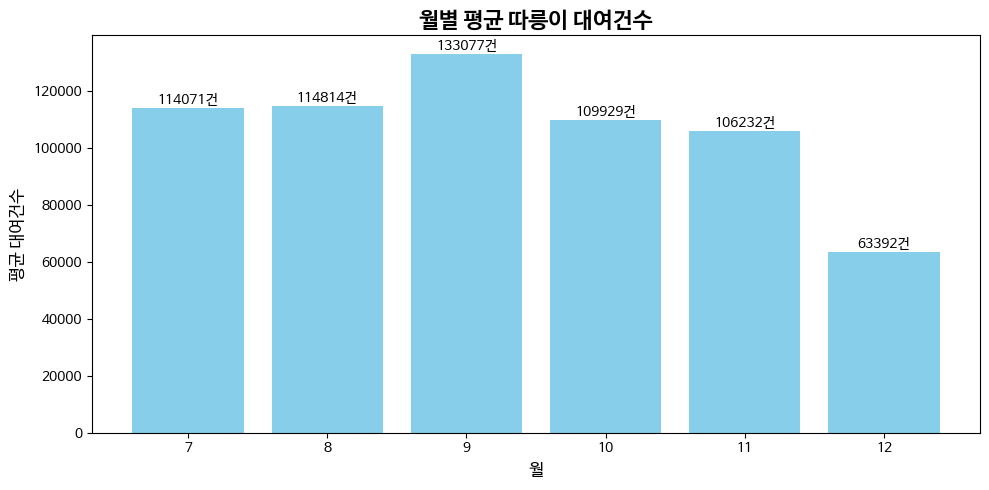

In [ ]:
bike['월'] = bike['대여일자'].dt.month

monthly_mean = bike.groupby('월')['대여건수'].mean()

plt.figure(figsize=(10, 5))
bars = plt.bar(monthly_mean.index, monthly_mean.values, color=['skyblue'])

plt.title('월별 평균 따릉이 대여건수', fontsize = 16, fontweight = 'bold')
plt.xlabel('월', fontsize = 12)
plt.ylabel('평균 대여건수', fontsize = 12)

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}건',
          ha='center', va='bottom', fontsize = 10)

plt.tight_layout()
plt.show()

*막대 - 월별로 비교하고 싶을 때/ 선 - 추세,흐름에 따른 결과를 알고 싶을 때

*월은 범주형 데이터

9월에 대여건수가 가장 많았고 12월에 대여건수가 대략 50% 감소했다.

겨울에 비해 여름에 대여건수가 더 많았다.

In [ ]:
# sns 스타일 설정
sns.set_theme(
    style = "whitegrid",
    font = "NanumBarunGothic"
)

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2026-02-03 07:36:21--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  3.42MB/s    in 0.3s    

2026-02-03 07:36:22 (3.42 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [ ]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")

data = ratings.merge(movies, on = "movieId")

data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [ ]:
data.columns.tolist()

['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


장르별 영화 분포 - 히스토그램

장르별로 평점을 비교하고 싶다 - 막대그래프

러닝타임이 평점에 영향을 끼치는가. - 산점도

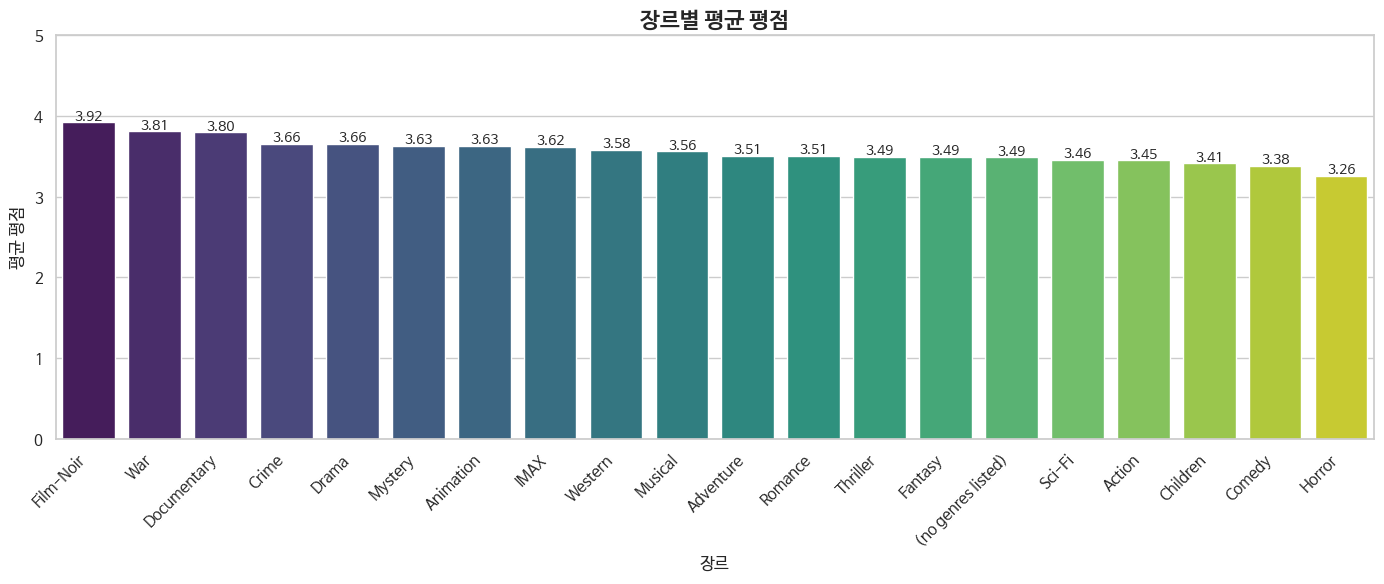

In [ ]:
# 장르별 평균 평점
genre_rating = (
    data.assign(genre = data["genres"].str.split("|"))
    .explode("genre")
    .groupby("genre")["rating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(14, 6))

sns.barplot(x=genre_rating.index, y=genre_rating.values,
            hue = genre_rating.index,
            palette = "viridis",
            legend = False
)
for i, v in enumerate(genre_rating.values):
  plt.text(i, v + 0.02, f"{v:.2f}", ha = 'center', fontsize = 10)


plt.title('장르별 평균 평점', fontsize = 16, fontweight = 'bold')
plt.xlabel('장르', fontsize = 12)
plt.ylabel('평균 평점', fontsize = 12)
plt.xticks(rotation = 45, ha = "right")
plt.ylim(0, 5)

plt.tight_layout()
plt.show()

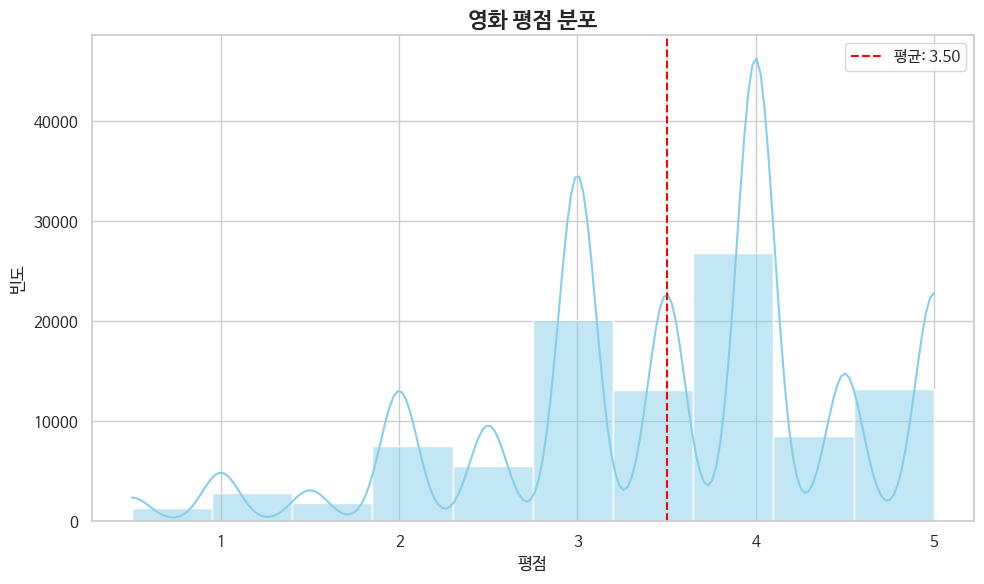

In [ ]:
# 영화 평점 분포 - 히스토그램
plt.figure(figsize=(10, 6))

sns.histplot(data["rating"], bins =10, kde=True, color = "skyblue") # kde는 분포 안의 경향성(추세)

plt.axvline(ratings["rating"].mean(), color='red', linestyle='--', label=f"평균: {ratings['rating'].mean():.2f}")

plt.title('영화 평점 분포', fontsize = 16, fontweight = 'bold')
plt.xlabel('평점', fontsize = 12)
plt.ylabel('빈도', fontsize = 12)
plt.legend(fontsize = 11)

plt.tight_layout()
plt.show()

평균은 3.5점이고 3-4점대로 평가한 빈도가 많다.

3점 이상의 평점으로 치우쳐서 분포되어 있다.

1-2점대의 평점의 빈도 수는 비교적 적다.

In [ ]:
# 장르별 평점 분포 - 바이올린 플롯

# 장르 전처리

data["main_genre"] = data["genres"].str.split("I").str[0]

major_genres = ["Action", "Comedy", "Drama", "Romance", "Thriller"]
genre_filtered = data[data["main_genre"].isin(major_genres)]

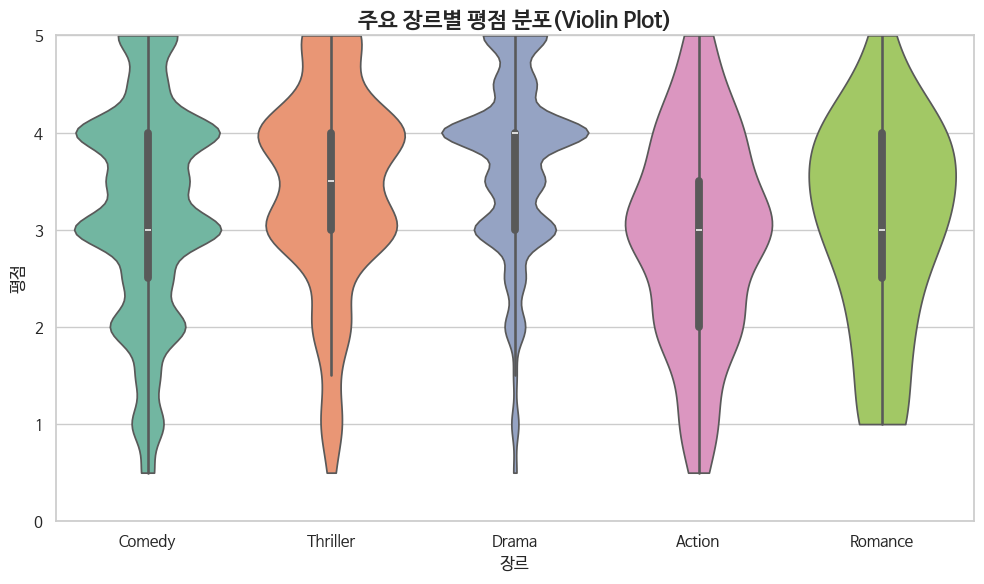

In [ ]:
# 바이올린 플롯

plt.figure(figsize=(10, 6))

sns.violinplot(data = genre_filtered, x="main_genre", y="rating", hue="main_genre", palette="Set2", legend=False, inner = "box", cut = 0)
plt.title('주요 장르별 평점 분포(Violin Plot)', fontsize = 16, fontweight = 'bold')
plt.xlabel('장르', fontsize = 12)
plt.ylabel('평점', fontsize = 12)
plt.ylim(0, 5)

plt.tight_layout()
plt.show()

# 영화 평점 수와 평균 평점 관계

평점 수가 많을수록 평점이 안정적이어진다.
제목별 평점 개수


In [ ]:
# 영화 평점 수와 평균 평점 관계

